In [101]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [102]:
df = pd.read_csv('diamonds.csv')

In [103]:
df.head(3)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [104]:
df = df.drop('Unnamed: 0', axis=1)

In [105]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [106]:

cut_map = {
    'Fair': 0,
    'Good': 1,
    'Very Good': 2,
    'Premium': 3,
    'Ideal': 4
}

df['cut'] = df['cut'].map(cut_map)

In [107]:

color_map = {
    'D': 0,
    'E': 1,
    'F': 2,
    'G': 3,
    'H': 4,
    'I': 5,
    'J': 6
}

df['color'] = df['color'].map(color_map)

In [108]:

clarity_map = {
    'I1': 0,
    'SI2': 1,
    'SI1': 2,
    'VS2': 3,
    'VS1': 4,
    'VVS2': 5,
    'VVS1': 6,
    'IF': 7
}

df['clarity'] = df['clarity'].map(clarity_map)

In [109]:
X = df.values

In [92]:
# X_scaled = scaler.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
\\\ KMeans Clustering Model

In [110]:
n_clusters = 6
model = KMeans(n_clusters=n_clusters, random_state=0)

In [111]:
y = model.fit_predict(X)
print(y)

[0 0 0 ... 3 3 3]


In [112]:
centres=model.cluster_centers_
print(centres)

[[3.82813841e-01 3.07317630e+00 2.30461974e+00 3.56199215e+00
  6.17232813e+01 5.70216562e+01 9.10683877e+02 4.63757464e+00
  4.64604401e+00 2.86463572e+00]
 [1.56603580e+00 2.91607981e+00 3.05516432e+00 3.08802817e+00
  6.16533157e+01 5.78010857e+01 1.14007556e+04 7.41288439e+00
  7.42163732e+00 4.56688087e+00]
 [1.25419489e+00 2.86319773e+00 3.01929991e+00 3.03235572e+00
  6.17797729e+01 5.76962346e+01 7.62945014e+03 6.88368780e+00
  6.87949480e+00 4.25066793e+00]
 [7.13910353e-01 2.81946777e+00 2.44770577e+00 2.94244541e+00
  6.17659800e+01 5.75372204e+01 2.56903492e+03 5.70625497e+00
  5.71009195e+00 3.52661922e+00]
 [1.92933190e+00 2.86939655e+00 3.29094828e+00 2.62068966e+00
  6.16400431e+01 5.79879741e+01 1.60806966e+04 7.94642241e+00
  7.93724138e+00 4.88665517e+00]
 [1.04411843e+00 2.64757981e+00 2.85849640e+00 2.12471679e+00
  6.18323584e+01 5.79688774e+01 4.80378857e+03 6.48046962e+00
  6.47701030e+00 4.00321833e+00]]


Text(0, 0.5, 'Price')

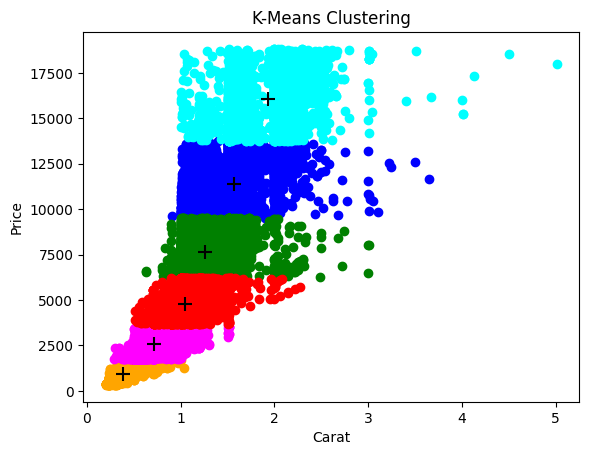

In [113]:
colors = ['orange', 'blue', 'green', 'magenta', 'cyan', 'red']
for i in range(n_clusters):
    plt.scatter(X[y == i, 0], X[y == i, 6], c=colors[i])
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 6], color='black', marker='+', s=100)
plt.title('K-Means Clustering')
plt.xlabel('Carat')
plt.ylabel('Price')

### Optimize the Model

Text(0, 0.5, 'SSE')

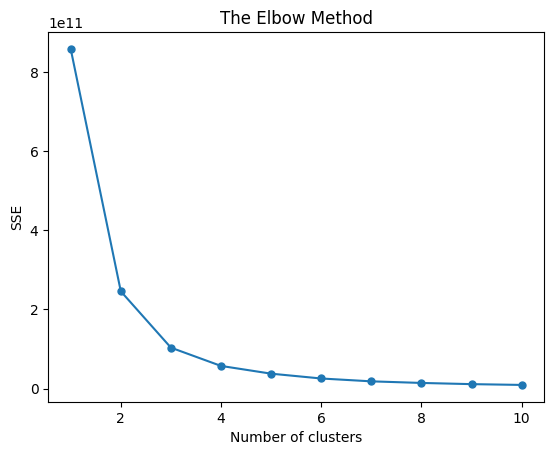

In [119]:
from sklearn.cluster import KMeans
scores = []
for i in range(1, 11):
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(X)
    scores.append(model.inertia_)

plt.plot(range(1, 11), scores, marker='.', markersize=10)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE') # Model Inertia

In [125]:
model2 = KMeans(n_clusters=4, random_state=0)
y2 = model2.fit_predict(X)
centres2=model2.cluster_centers_

Text(0, 0.5, 'Price')

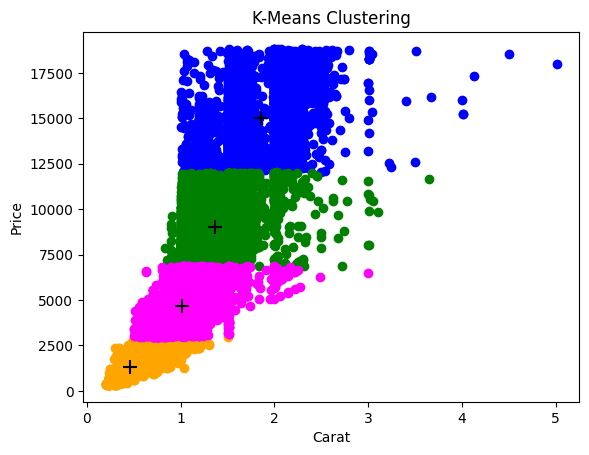

In [128]:
colors = ['orange', 'blue', 'green', 'magenta', 'cyan', 'red']
for i in range(4):
    plt.scatter(X[y2 == i, 0], X[y2 == i, 6], c=colors[i])
plt.scatter(model2.cluster_centers_[:, 0], model2.cluster_centers_[:, 6], color='black', marker='+', s=100)
plt.title('K-Means Clustering')
plt.xlabel('Carat')
plt.ylabel('Price')


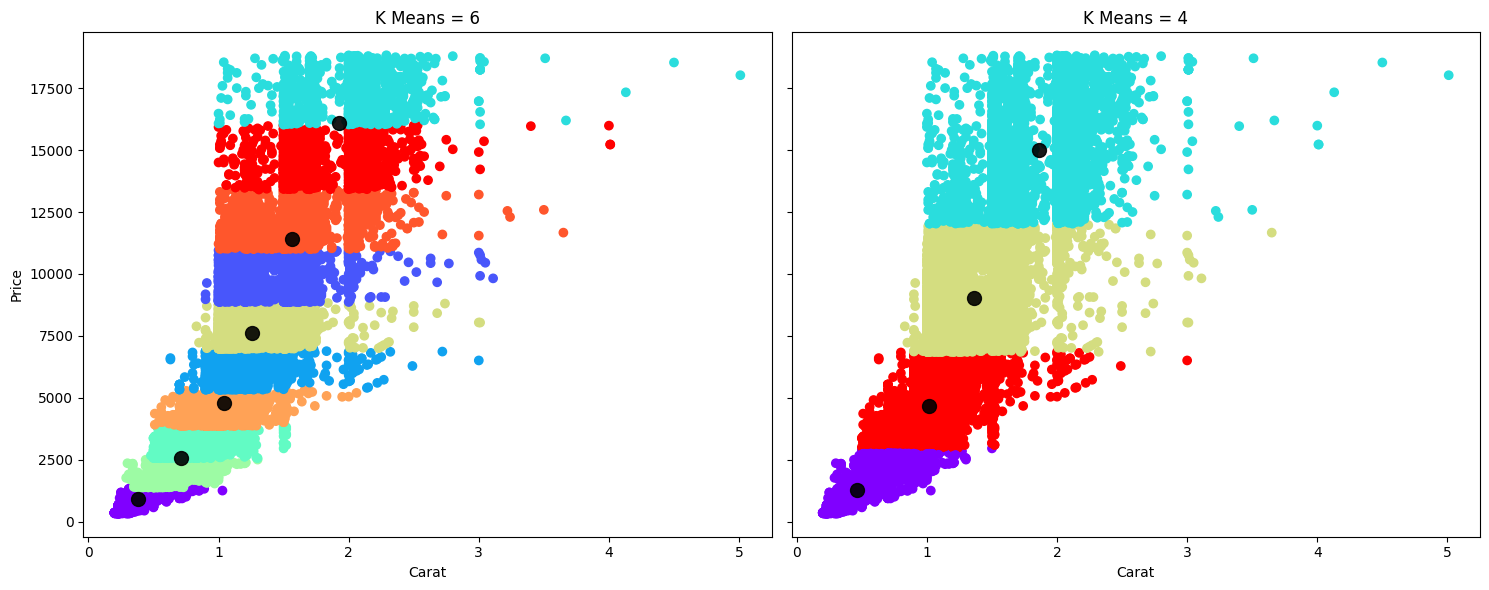

In [139]:
f, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,sharey=True,figsize=(15,6))


ax1.set_title('K Means = 6')
ax1.scatter(X[:, 0], X[:, 6], c=model.labels_, cmap='rainbow')
ax1.scatter(x=centres[:, 0], y=centres[:, 6], c='black', s=100, alpha=0.9)

# Plot for KMeans with 4 clusters
ax2.set_title('K Means = 4')
ax2.scatter(X[:, 0], X[:, 6], c=model2.labels_, cmap='rainbow')
ax2.scatter(x=centres2[:, 0], y=centres2[:, 6], c='black', s=100, alpha=0.9)

# Label axes
ax1.set_xlabel('Carat')
ax2.set_xlabel('Carat')
ax1.set_ylabel('Price')

plt.tight_layout()
plt.show()

### Hierarchichal Clustering

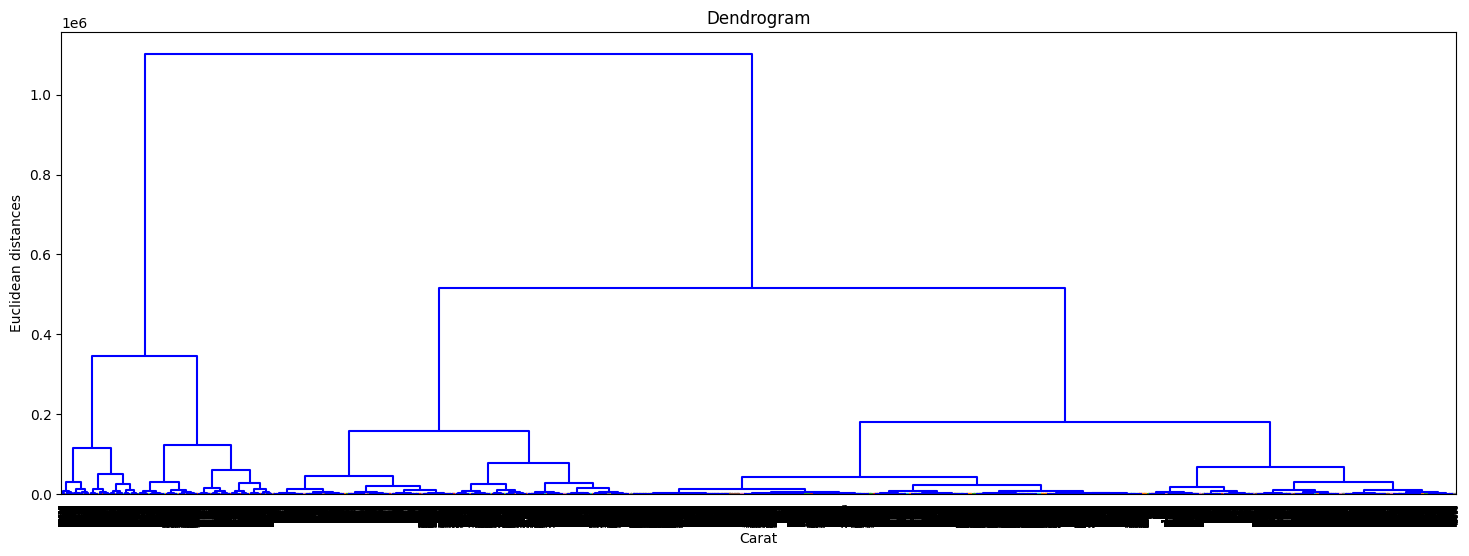

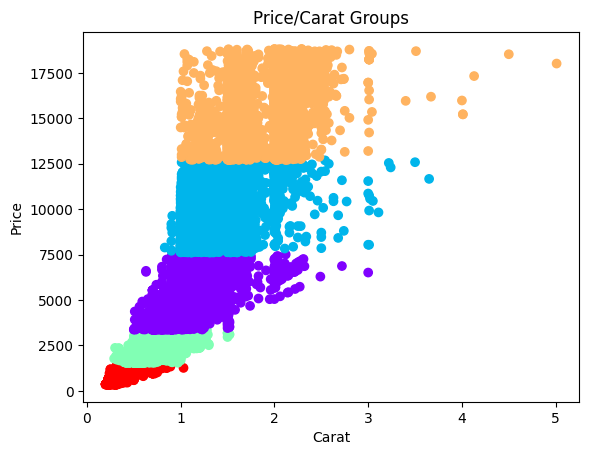

In [146]:
import scipy.cluster.hierarchy as sch

from sklearn.cluster import AgglomerativeClustering

#SciPy Dendogram
plt.figure(figsize=(18,6))
plt.title('Dendrogram')
plt.xlabel('Carat')
plt.ylabel('Euclidean distances')
dendrogram = sch.dendrogram(sch.linkage(X, method ='ward'),
                            color_threshold=200, 
                            above_threshold_color='blue') 
plt.show()

# SciKitLearn Agglomerative Clustering
modelA = AgglomerativeClustering(n_clusters = 5, metric ='euclidean',
                                 linkage ='ward')
yA = modelA.fit_predict(X)

plt.scatter(X[:, 0], X[:, 6], c=yA, cmap="rainbow")
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title("Price/Carat Groups")
plt.show()

### Meanshift Clustering

In [162]:
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(X, quantile=0.10 )

model_meanshift = MeanShift(bandwidth = bandwidth)
model_meanshift.fit(X)

MeanShift(bandwidth=np.float64(914.1880848843377))

In [163]:
clusters_meanshift = model_meanshift.predict(X)

print("Unique CLusters:", np.unique(clusters_meanshift))
print("Number of Unique Clusters:", len(np.unique(clusters_meanshift)))

Unique CLusters: [0 1 2]
Number of Unique Clusters: 3


In [164]:
clusters_meanshift

array([0, 0, 0, ..., 1, 1, 1])

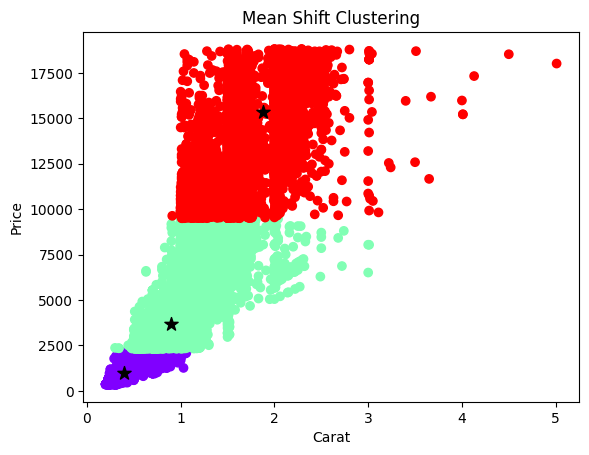

In [165]:
cluster_centers = model_meanshift.cluster_centers_

plt.scatter(X[:, 0], X[:, 6], c=clusters_meanshift, cmap="rainbow")
plt.scatter(model_meanshift.cluster_centers_[:, 0],
            model_meanshift.cluster_centers_[:, 6],
            color = 'black',
            marker = '*',
            s = 100)
plt.title('Mean Shift Clustering')
plt.xlabel('Carat')
plt.ylabel('Price')

plt.show()

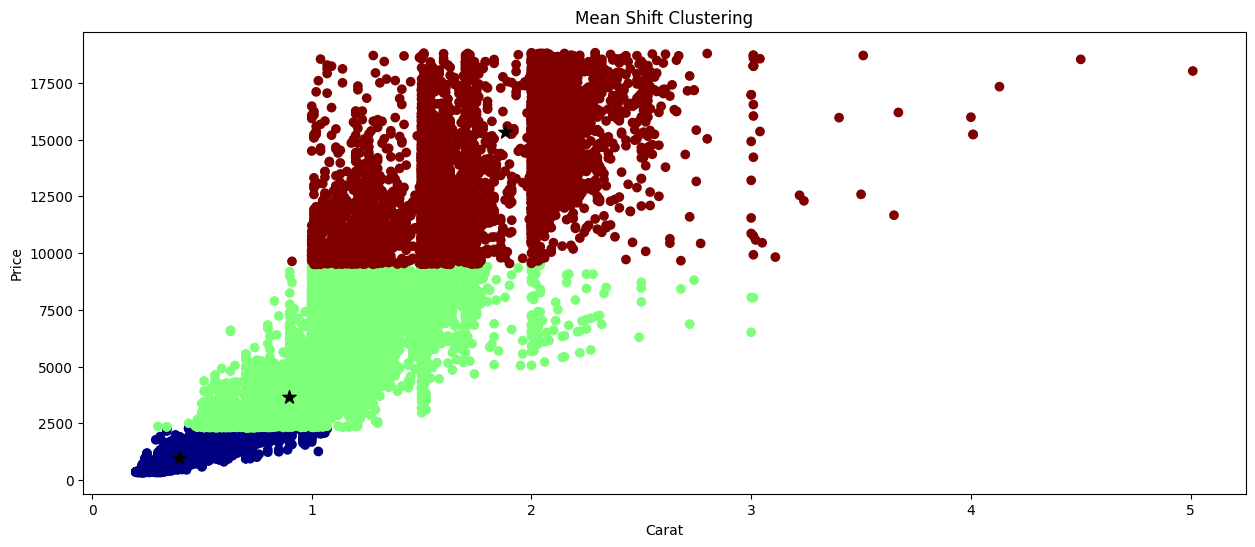

In [166]:
f, (ax1) = plt.subplots(nrows=1,figsize=(15,6))

ax1.set_title('Mean Shift Clustering')
ax1.set_xlabel('Carat')
ax1.set_ylabel('Price')
ax1.scatter(X[:, 0], X[:, 6], c=clusters_meanshift, cmap="jet")
ax1.scatter(model_meanshift.cluster_centers_[:, 0],
            model_meanshift.cluster_centers_[:, 6],
            color = 'black', marker = '*', s = 100)